# Laboratorio No.9 - Visualizacion de datos
**Integrantes**
- Paola de León 20361
- Gabriela Contreras 20213 


### Cargar data

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data = pd.read_csv("Food Share Emissions.csv")

/var/folders/0g/6n9p7vxs5c1ccxc_tp3slgy40000gn/T/ipykernel_29498/2284674417.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


### Gráficos

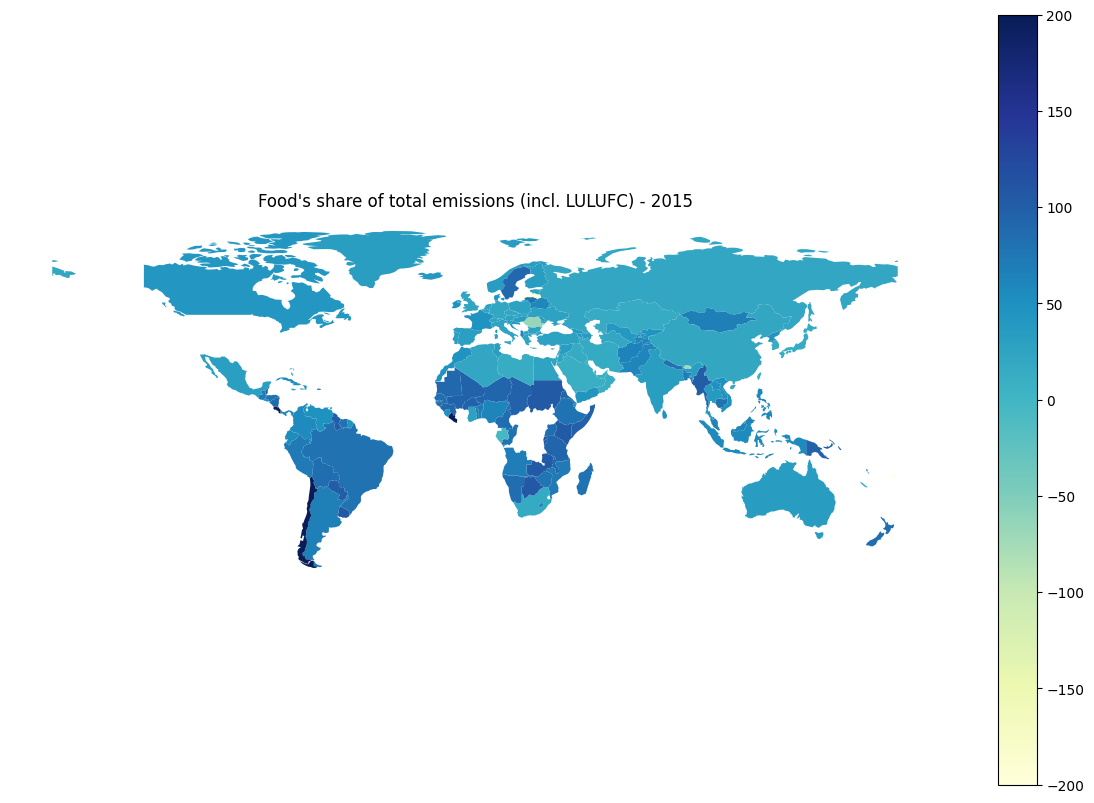

In [2]:
data_2015 = data[data['Year'] == 2015]
world_data = world.merge(data_2015, left_on='name', right_on='Entity')

# Min y max de valores
min_emissions = data["Emissions"].min()
max_emissions = data["Emissions"].max()

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_data.plot(column="Emissions", cmap="YlGnBu", linewidth=0.8, ax=ax, legend=True, vmin=-200, vmax=200)

ax.set_title("Food's share of total emissions (incl. LULUFC) - 2015")
ax.set_axis_off()
plt.show()



In [3]:
# Pais que más y menos  emision tiene en el año más reciente y hacer un grafico de tendencia con el tiempo 
# País con las emisiones más altas en 2015
pais_mas_emisiones = data_2015.loc[data_2015['Emissions'].idxmax()]
nameGreater = pais_mas_emisiones["Entity"]

# País con emisiones más bajas en 2015
pais_menos_emisiones = data_2015.loc[data_2015['Emissions'].idxmin()]
nameMinus = pais_menos_emisiones["Entity"]

print("País con las emisiones más altas en 2015:")
print(pais_mas_emisiones)

print("\nPaís con las emisiones más bajas en 2015:")
print(pais_menos_emisiones)


País con las emisiones más altas en 2015:
Entity       Micronesia
Code                NaN
Year               2015
Emissions     778.98225
Name: 3301, dtype: object

País con las emisiones más bajas en 2015:
Entity            Latvia
Code                 LVA
Year                2015
Emissions   -2302.854328
Name: 2781, dtype: object


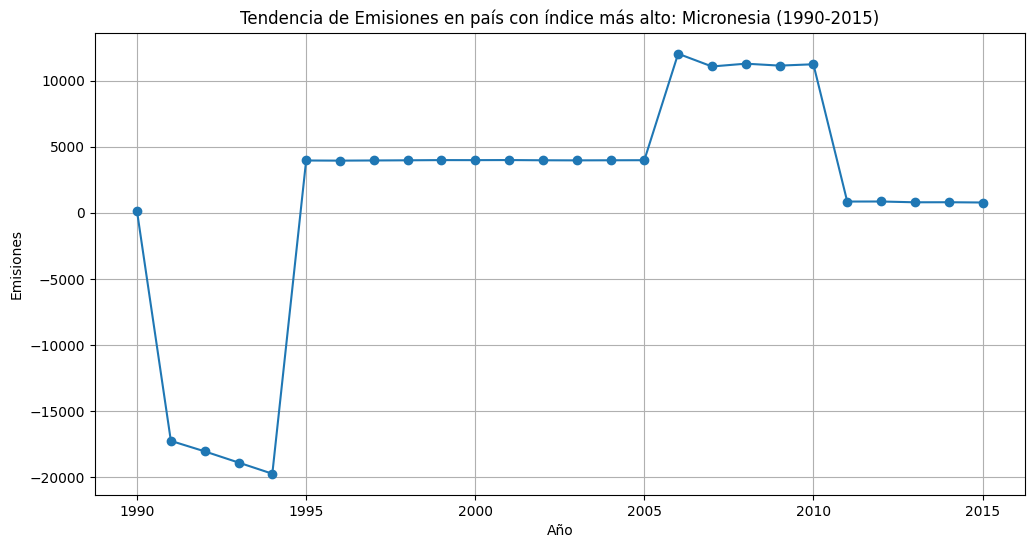

In [22]:
greaterInfo = data[(data['Entity'] == nameGreater) & (data['Year'] >= 1990) & (data['Year'] <= 2015)]

plt.figure(figsize=(12, 6))
plt.plot(greaterInfo['Year'], greaterInfo["Emissions"], marker='o', linestyle='-')
plt.title(f"Tendencia de Emisiones en país con índice más alto: {nameGreater} (1990-2015)")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.grid(True)
plt.show()

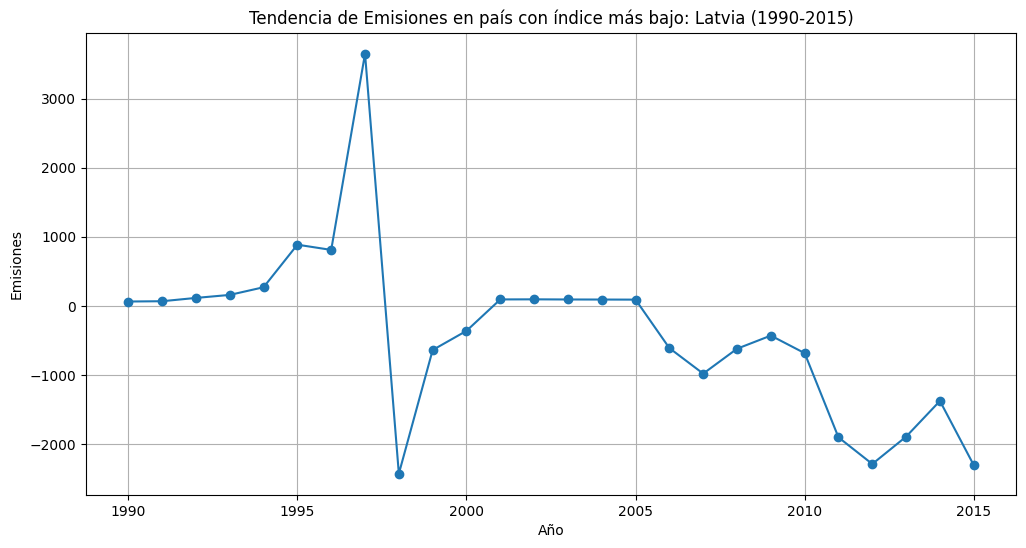

In [24]:
minusInfo = data[(data['Entity'] == nameMinus) & (data['Year'] >= 1990) & (data['Year'] <= 2015)]

plt.figure(figsize=(12, 6))
plt.plot(minusInfo['Year'], minusInfo["Emissions"], marker='o', linestyle='-')
plt.title(f"Tendencia de Emisiones en país con índice más bajo: {nameMinus} (1990-2015)")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

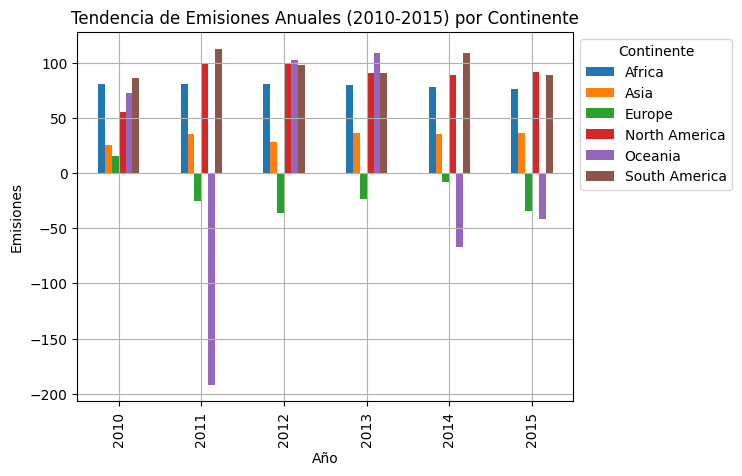

In [6]:
merged_data = world.merge(data, left_on='name', right_on='Entity')
filtered_data = merged_data[(merged_data['Year'] >= 2010) & (merged_data['Year'] <= 2015)]
pivot_table = pd.pivot_table(filtered_data, values='Emissions', index='Year', columns='continent', aggfunc='mean')

plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar')
plt.title("Tendencia de Emisiones Anuales (2010-2015) por Continente")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.legend(title="Continente", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


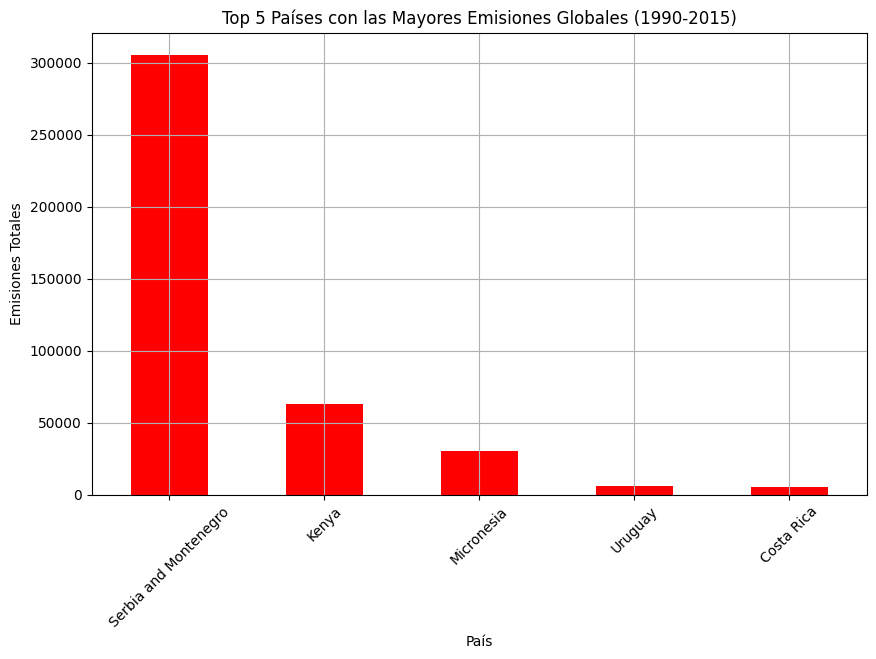

In [17]:
# Top 5 de los paises con mayor emision global 
total_emissions_by_country = data.groupby('Entity')['Emissions'].sum()
top_5_countries = total_emissions_by_country.nlargest(5)

plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='red')
plt.title("Top 5 Países con las Mayores Emisiones Globales (1990-2015)")
plt.xlabel("País")
plt.ylabel("Emisiones Totales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

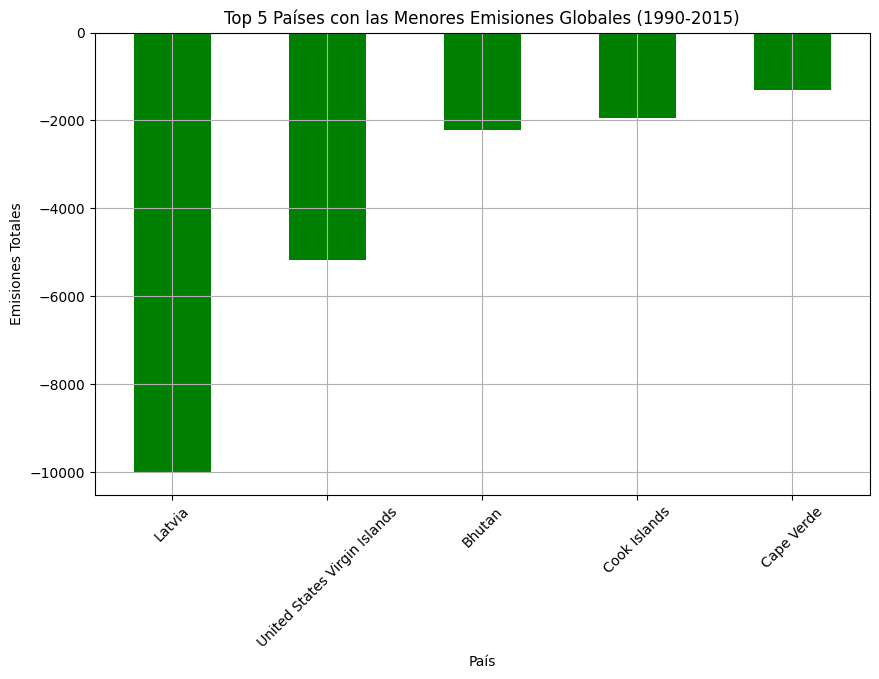

In [20]:
# 5 países con las menores emisiones totales
bottom_5_countries = total_emissions_by_country.nsmallest(5)

plt.figure(figsize=(10, 6))
bottom_5_countries.plot(kind='bar', color='green')
plt.title("Top 5 Países con las Menores Emisiones Globales (1990-2015)")
plt.xlabel("País")
plt.ylabel("Emisiones Totales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
# top 5 de los paises con mayor emision en los ultimos 5 años - G

In [9]:
#comparacion de guatemala con el mundo y america latina -G

In [10]:
#comparacion de guatemala  y america latina -G

In [11]:
#Gráfico de Línea Múltiple por País o Gráfico de Torta por País -G

Reflexión
----

RESPUESTA 